# Utilize CIFAR-10 Dataset to train a CNN model

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. 

# The CIFAR-10 Dataset

Contains 10 categories of Images-

Airplane

Automobile

Bird

Cat

Deer

Dog

Frog

Horse

Ship

Truck

Importing necessary libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets , layers , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix , classification_report
import keras

import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.keras.datasets import cifar10

Split dataset into training and testing sets

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

Data preprocessing

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

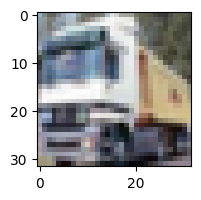

In [11]:
#data visualization
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [12]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
classes[9]

'truck'

In [14]:
classes[3]

'cat'

In [15]:
classes[6]

'frog'

In [46]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

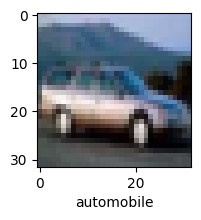

In [17]:
plot_sample(x_train,y_train,4)

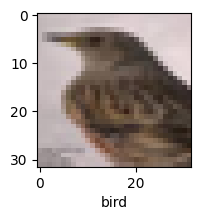

In [18]:
plot_sample(x_train,y_train,18)

# Formatting data by normalization

In [19]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
y_train.shape

(50000, 10)

In [22]:
x_test.shape

(10000, 32, 32, 3)

In [23]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# CNN

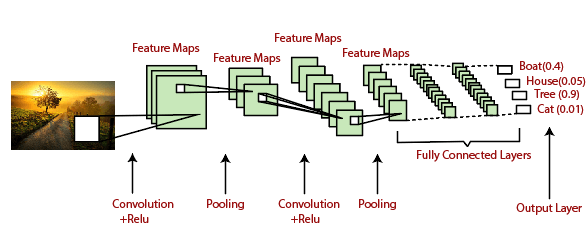

In [417]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, batch_size=128, epochs=1, validation_split=0.2)
     

313/313 [==============================] - 35s 109ms/step - loss: 1.4723 - accuracy: 0.4724 - val_loss: 1.2610 - val_accuracy: 0.5564


In [418]:
model.fit(x_train,y_train,epochs=5, batch_size=128,validation_split=0.2)

Epoch 1/5
313/313 [==============================] - 34s 107ms/step - loss: 1.1047 - accuracy: 0.6075 - val_loss: 1.1038 - val_accuracy: 0.6096
Epoch 2/5
313/313 [==============================] - 32s 102ms/step - loss: 0.9554 - accuracy: 0.6679 - val_loss: 0.9742 - val_accuracy: 0.6642
Epoch 3/5
313/313 [==============================] - 31s 100ms/step - loss: 0.8603 - accuracy: 0.7009 - val_loss: 0.9476 - val_accuracy: 0.6714
Epoch 4/5
313/313 [==============================] - 32s 103ms/step - loss: 0.7845 - accuracy: 0.7263 - val_loss: 0.9344 - val_accuracy: 0.6800
Epoch 5/5
313/313 [==============================] - 32s 102ms/step - loss: 0.7160 - accuracy: 0.7509 - val_loss: 0.9283 - val_accuracy: 0.6841


In [38]:
cnn_loss, cnn_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 46s 147ms/step - loss: 0.8853 - accuracy: 0.7772


In [423]:
cnn_test = model.predict(x_test)
cnn_classes = np.argmax(y_test, axis=1)
cnn_test = np.argmax(cnn_test, axis=1)

313/313 [==============================] - 5s 15ms/step


# CNN Model Evaluation

In [424]:
cnn_report = classification_report(cnn_classes, cnn_test)
cnn_confusion = confusion_matrix(cnn_classes, cnn_test)
print("CNN Model Evaluation Metrics:")
print(cnn_report)
print("CNN Model Confusion Matrix:")
print(cnn_confusion)

CNN Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1000
           1       0.82      0.77      0.79      1000
           2       0.58      0.51      0.54      1000
           3       0.53      0.50      0.52      1000
           4       0.65      0.64      0.64      1000
           5       0.62      0.56      0.58      1000
           6       0.73      0.81      0.77      1000
           7       0.76      0.73      0.74      1000
           8       0.66      0.87      0.75      1000
           9       0.76      0.75      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

CNN Model Confusion Matrix:
[[693  17  37  18  11   2  15   6 151  50]
 [ 29 772   6  10   1   7  10   3  64  98]
 [ 84   8 508  56 106  61  83  46  33  15]
 [ 27  11  87 504  59 149  70  34  38  21]
 [ 22   3  

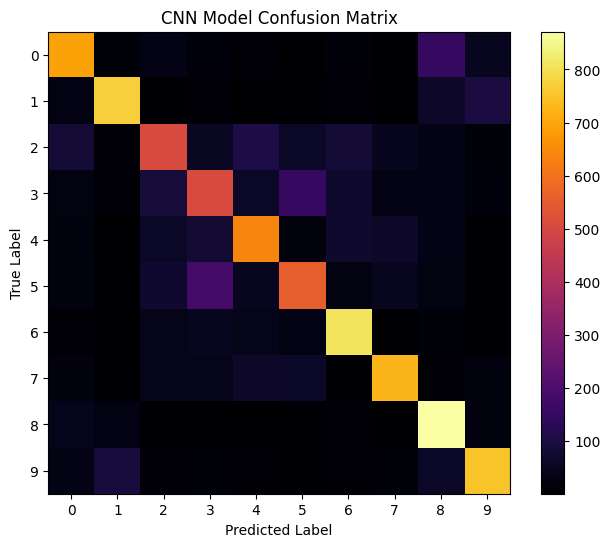

In [425]:
plt.figure(figsize=(8, 6))
plt.imshow(cnn_confusion, cmap='inferno')
plt.title('CNN Model Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()
     

# Using Transfer Learning to get better accuracy

# VGG19 Model

# Base Model

In [24]:
base_model=VGG19(weights='imagenet',include_top=False,input_shape=(32,32,3))

Creating Model

In [25]:
for layer in base_model.layers:
    layers.trainable=False

In [26]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [27]:
model.compile(optimizer=keras.optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
     

In [29]:
history=model.fit(x_train, y_train, batch_size=128, epochs=3, validation_split=0.2)
     

Epoch 1/3
313/313 [==============================] - 747s 2s/step - loss: 1.1140 - accuracy: 0.6202 - val_loss: 0.7499 - val_accuracy: 0.7495
Epoch 2/3
313/313 [==============================] - 741s 2s/step - loss: 0.6767 - accuracy: 0.7793 - val_loss: 0.5643 - val_accuracy: 0.8089
Epoch 3/3
313/313 [==============================] - 727s 2s/step - loss: 0.5152 - accuracy: 0.8323 - val_loss: 0.5286 - val_accuracy: 0.8184


# Transfer Learning

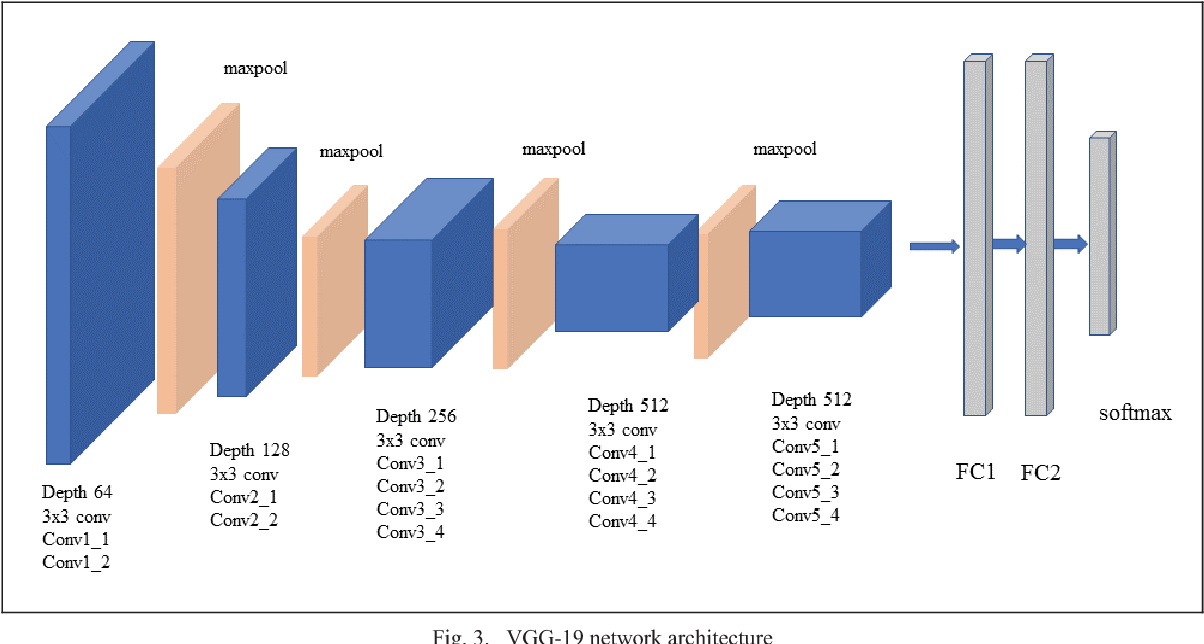

In [30]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(256, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation='softmax'))

In [31]:
transfer_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=1e-4),
             metrics=['accuracy'])

In [32]:
transfer_model.fit(x_train, y_train,epochs=1, validation_split=0.2)

1250/1250 [==============================] - 954s 759ms/step - loss: 0.6575 - accuracy: 0.7931 - val_loss: 0.6533 - val_accuracy: 0.7900


In [33]:
transfer_loss, transfer_accuracy = transfer_model.evaluate(x_test, y_test)

313/313 [==============================] - 47s 151ms/step - loss: 0.6769 - accuracy: 0.7831


In [34]:
transfer_test= transfer_model.predict(x_test)
transfer_classes = np.argmax(y_test, axis=1)
transfer_test = np.argmax(transfer_test, axis=1)

313/313 [==============================] - 45s 142ms/step


# Transfer Learning Model Evaluation

In [35]:
t_report = classification_report(transfer_classes, transfer_test)
t_confusion = confusion_matrix(transfer_classes, transfer_test)
print("Transfer Learning Model Evaluation Metrics:")
print(t_report)
print("Transfer Learning Model Confusion Matrix:")
print(t_confusion)

Transfer Learning Model Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1000
           1       0.84      0.92      0.88      1000
           2       0.64      0.79      0.71      1000
           3       0.66      0.61      0.63      1000
           4       0.73      0.80      0.76      1000
           5       0.75      0.68      0.71      1000
           6       0.94      0.68      0.79      1000
           7       0.74      0.90      0.81      1000
           8       0.84      0.90      0.86      1000
           9       0.90      0.84      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000

Transfer Learning Model Confusion Matrix:
[[701  14  72  44  31   1   2  21  98  16]
 [  7 920   2   2   2   1   0   4  12  50]
 [ 20   4 793  38  66  31   6  37   4   1]
 [  3  15  67 612  63 136 

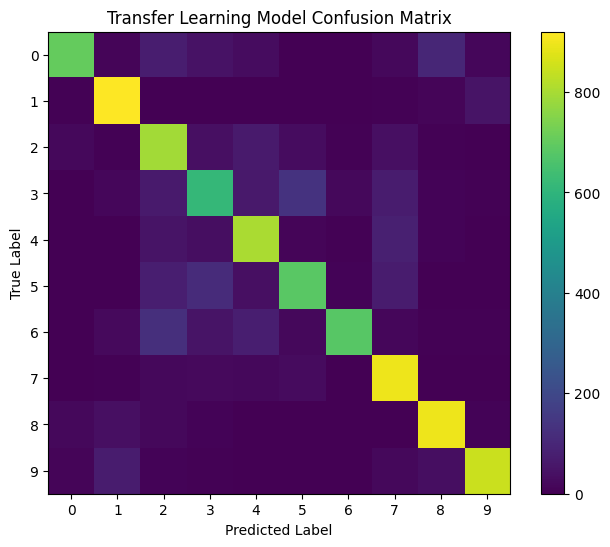

In [36]:
plt.figure(figsize=(8, 6))
plt.imshow(t_confusion, cmap='viridis')
plt.title('Transfer Learning Model Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()


# Models Evaluation

In [39]:
results= pd.DataFrame({
    'Model': ['CNN Model', 'Transfer Learning Model'],
    'Test Loss': [cnn_loss, transfer_loss],
    'Test Accuracy': [cnn_accuracy, transfer_accuracy]
})
results
     

,Model,Test Loss,Test Accuracy
0,CNN Model,0.885316,0.7772
1,Transfer Learning Model,0.676875,0.7831


In [41]:
cnn_train_loss, cnn_train_acc = model.evaluate(x_train, y_train)

1563/1563 [==============================] - 238s 152ms/step - loss: 0.7886 - accuracy: 0.8236


In [43]:
transfer_train_loss, transfer_train_acc = transfer_model.evaluate(x_train, y_train)

1563/1563 [==============================] - 249s 159ms/step - loss: 0.5317 - accuracy: 0.8317


In [44]:
performance= pd.DataFrame({
    'Model': ['CNN Model', 'Transfer Learning Model'],
    'Training Accuracy': [cnn_train_acc, transfer_train_acc],
    'Test Accuracy': [cnn_accuracy, transfer_accuracy]
})
print(performance)

                     Model  Training Accuracy  Test Accuracy
0                CNN Model            0.82358         0.7772
1  Transfer Learning Model            0.83168         0.7831


# Overfitting Analysis

We’ve noticed overfitting issue. To reduce this, we useoverfitting reduction process using Dropout layer(used above in models). It’s a technique to prevent overfitting. It deactivates few neurons of any layer randomly. 

# THANK YOU